<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/intro/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 The perceptron model is given by 

 $
\hat{y} = \Theta \left( \mathbf{x}^T \mathbf{w} \right)\,,
$

where $\Theta$ is the Heaviside step function. It is an example of a binary classifier, and is capable of learning whether an example belongs to a specific binary class (labelled by 0 and 1). Because of the non-linearity of the step function we cannot solve for the weights using the normal equations. 

Perceptrons can be trained using the perceptron learning algorithm, which iteratively updates the weights depending on the size of the prediction error: 

1. Initialise the weights to either 0 or a small random value.

2. Iteratively update the weights by 
$
\mathbf{w}  \rightarrow  \mathbf{w}  - \alpha \mathbf{X}^T \left(\hat{\mathbf{Y}} - \mathbf{Y} \right)\,, 
$ where $\alpha$ is the learning rate. The choice of learning rate is not actually important for the perceptron learning algorithm, but we shall use this form to compare with gradient descent methods. 

3. Repeat step 2 until a stopping condition it met. This could be, for example, a maximum number of iterations, or a condition that the loss has not improved significantly from the previous iteration. 


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Let us first attempt to learn the AND function. We will set the initial weights to a small random value, the learning rate to $\alpha=0.1$ and use a fixed number of iterations.

In [0]:
learning_rate = 0.1
num_epochs = 10

In [3]:
X = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
print(X)

[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]


In [4]:
Y = np.array([[0], [0], [0], [1]])
print(Y)

[[0]
 [0]
 [0]
 [1]]


In [5]:
np.random.seed(0)
w = 0.1 * np.random.random(size=(3, 1))
print(w)

[[0.05488135]
 [0.07151894]
 [0.06027634]]


In [0]:
for i in range(num_epochs):
  Yhat = np.heaviside(np.matmul(X, w), 0)
  w -= learning_rate * np.matmul(X.T, Yhat - Y)

In [7]:
print(w)

[[-0.24511865]
 [ 0.17151894]
 [ 0.16027634]]


Check the classification of each example

In [8]:
Yhat = np.heaviside(np.matmul(X, w), 0)
print(Yhat)

[[0.]
 [0.]
 [0.]
 [1.]]


Plot the decision boundary for all values of $\mathbf{x}$

In [0]:
id0 = np.where(Y[:, 0] == 0)
id1 = np.where(Y[:, 0] == 1)

In [0]:
xx, yy = np.mgrid[-1:2:.01, -1:2:.01]
Yhat = np.heaviside(w[0] + w[1] * xx + w[2] * yy, 0)

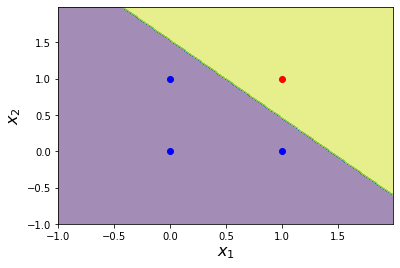

In [11]:
plt.figure()
plt.contourf(xx, yy, Yhat, alpha=0.5)
plt.scatter(X[id0, 1], X[id0, 2], color='blue')
plt.scatter(X[id1, 1], X[id1, 2], color='red')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()

Now let us attempt to learn the XOR function.

In [12]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


In [13]:
np.random.seed(0)
w = 0.1 * np.random.random(size=(3, 1))
print(w)

[[0.05488135]
 [0.07151894]
 [0.06027634]]


In [0]:
for i in range(num_epochs):
  Yhat = np.heaviside(np.matmul(X, w), 0)
  w -= learning_rate * np.matmul(X.T, Yhat - Y)

In [15]:
print(w)

[[0.05488135]
 [0.07151894]
 [0.06027634]]


Check the classification of each example

In [16]:
Yhat = np.heaviside(np.matmul(X, w), 0)
print(Yhat)

[[1.]
 [1.]
 [1.]
 [1.]]


Plot the decision boundary for all values of $\mathbf{x}$

In [0]:
id0 = np.where(Y[:, 0] == 0)
id1 = np.where(Y[:, 0] == 1)

In [0]:
xx, yy = np.mgrid[-1:2:.01, -1:2:.01]
Yhat = np.heaviside(w[0] + w[1] * xx + w[2] * yy, 0)

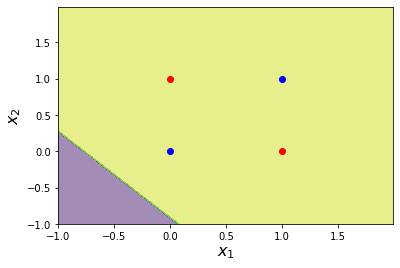

In [19]:
plt.figure()
plt.contourf(xx, yy, Yhat, alpha=0.5)
plt.scatter(X[id0, 1], X[id0, 2], color='blue')
plt.scatter(X[id1, 1], X[id1, 2], color='red')
plt.xlabel('$x_1$', fontsize=16)
plt.ylabel('$x_2$', fontsize=16)
plt.show()